# Charting Fundamentals
## Subplots
to show plots side-by-side in one plot

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplot?

Signature: plt.subplot(*args, **kwargs)
Docstring:
Add an Axes to the current figure or retrieve an existing Axes.

This is a wrapper of `.Figure.add_subplot` which provides additional
behavior when working with the implicit API (see the notes section).

Call signatures::

   subplot(nrows, ncols, index, **kwargs)
   subplot(pos, **kwargs)
   subplot(**kwargs)
   subplot(ax)

Parameters
----------
*args : int, (int, int, *index*), or `.SubplotSpec`, default: (1, 1, 1)
    The position of the subplot described by one of

    - Three integers (*nrows*, *ncols*, *index*). The subplot will take the
      *index* position on a grid with *nrows* rows and *ncols* columns.
      *index* starts at 1 in the upper left corner and increases to the
      right. *index* can also be a two-tuple specifying the (*first*,
      *last*) indices (1-based, and including *last*) of the subplot, e.g.,
      ``fig.add_subplot(3, 1, (1, 2))`` makes a subplot that spans the
      upper 2/3 of the figure.
    - 

Create a 1x2 plot and set the current axis as the 1st subplot axis:

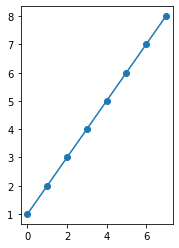

In [2]:
plt.figure()

plt.subplot(1,2,1)

# matplotlib uses NumPy arrays for almost all of the data, NOT lists of data
linear_data = np.array([1,2,3,4,5,6,7,8])
plt.plot(linear_data, '-o')

Now add a second plot next to this one with exponential data:

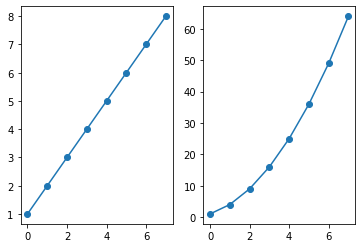

In [3]:
# our previous plot because our figure closes after each code cell
plt.subplot(1,2,1)
linear_data = np.array([1,2,3,4,5,6,7,8])
plt.plot(linear_data, '-o')

# second subplot
plt.subplot(1,2,2)
exponential_data = linear_data**2
plt.plot(exponential_data, '-o')

Usually, you store the axis object you get back from the subplot. You can move back and forth between axis objects in scripts. You don't have to do everything with one axis, then everything with the next, the third, etc.

The two images have different y-axis values >> misleading. When you create a subplot, you can specify that you want your subplots to share the same y-axis:

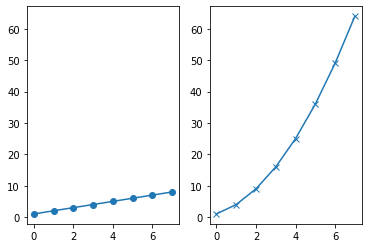

In [4]:
# plot the first figure again and get a reference to its axis
ax1 = plt.subplot(1,2,1)
plt.plot(linear_data, '-o')

# plot the second figure and share the y-axis as figure one
ax2 = plt.subplot(122, sharey=ax1) # don't need to create ax2 variable
plt.plot(exponential_data, '-x')

passed in one parameter for ax2: matplotlib developers let you combine the first 3 parameters into one number >> weird syntax and it limits you to a single digit for the three parameters

plot location in the matrix of items is indexed starting at 1, not 0 like NumPy. `subplots` lets you get multiple subplots at once:

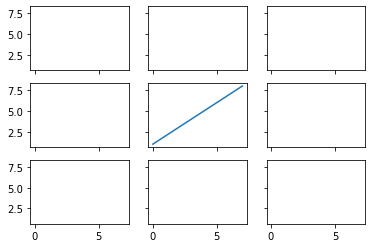

In [7]:
# create a 3x3 grid of subplots, using tuple unpacking
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3,3,sharex=True, sharey=True)

# plot in the middle of the grid (5th position)
ax5.plot(linear_data, '-')

If a figure doesn't exist, `plt.gcf()` will create one for us.

Instead of tuple unpacking, we could also iterate through a list and plot one at a time so we don't have to store references to each axes:

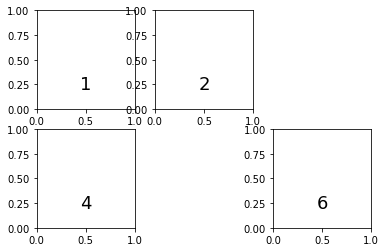

In [9]:
fig = plt.gcf()

# create a plot with 2 rows and 3 columns
for i in range(1,7):
    if i != 5 and i != 3:
        ax = fig.add_subplot(2,3,i) # the structure of the grid is stable at 2x3, so that's why 2 and 3 are hard-coded
        ax.text(0.5, 0.2, str((i)), fontsize=18, ha='center')

### SPLOM (Scatter PLot Matrices)
A common data science visual exploration technique: a quick way to see the relationship between a number of different variables 

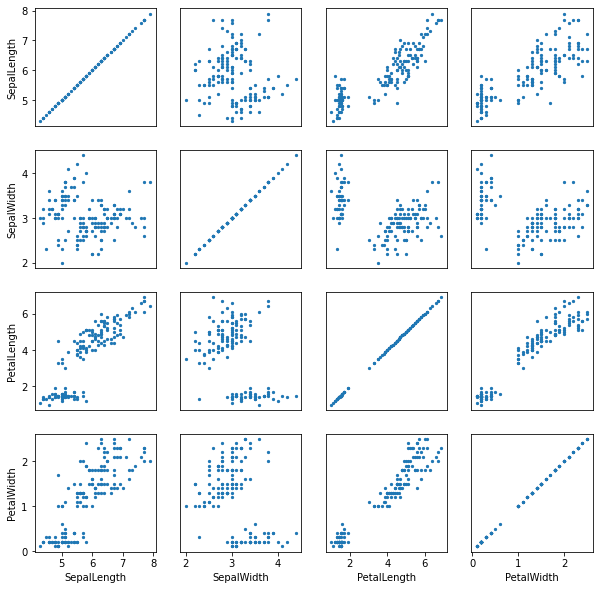

In [11]:
import pandas as pd
df = pd.read_csv("../assets/iris.csv")
cols = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

# create a grid of subplots of size width and height equal to the number of different variables
fig, axs = plt.subplots(len(cols), len(cols), figsize=(10,10))

# iterate across each columns in dataframe and compare to each other column in df
for i in range(len(cols)):
    for j in range(len(cols)):
        # make scatterplots for each combo of variables with a dot size of 5
        ## same column should make a diagonal line
        axs[i,j].scatter(df[cols[j]], df[cols[i]], s=5)
        
        # turn off axis tickmarks to keep it clean...
        axs[i,j].get_xaxis().set_visible(False)
        axs[i,j].get_yaxis().set_visible(False)        
        
        # ...but turn them on for the last row
        if i == len(cols) - 1:
            axs[i,j].get_xaxis().set_visible(True)
            axs[i,j].set_xlabel(cols[j])
            
        # ...and for the first column
        if j == 0:
            axs[i,j].get_yaxis().set_visible(True)
            axs[i,j].set_ylabel(cols[i])

There seems to be a linear relationship between PetalLength and PetalWidth

## Histograms
probability density function >> normal distribution has x-axis as the number of standard deviations

a bar chart where the x axis is a given observation and y is the frequency of that observation

Example: look at normal distribution

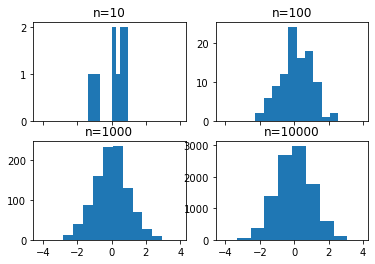

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# want to look at four different histograms
## don't want to share the y-axis because the histograms could have different frequencies for the values
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2,sharex=True)
axs = [ax1,ax2,ax3,ax4]

# we're interested in how uniform the distribution looks
## iterate through each axis
for n in range(0, len(axs)):
    sample_size = 10**(n+1) # will create sample sizes of 10, 100, 1000, 10000
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    
    # plot that sample
    axs[n].hist(sample)
    axs[n].set_title(f'n={sample_size}')

Currently, bin width = 10 >> let's change to 100 to get a finer cut of the data:

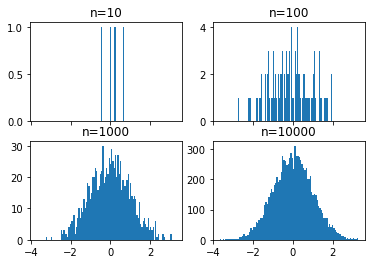

In [13]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2,sharex=True)
axs = [ax1,ax2,ax3,ax4]

# we're interested in how uniform the distribution looks
## iterate through each axis
for n in range(0, len(axs)):
    sample_size = 10**(n+1) # will create sample sizes of 10, 100, 1000, 10000
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    
    # plot that sample
    axs[n].hist(sample, bins=100)
    axs[n].set_title(f'n={sample_size}')

For the n=10 subplot, each sample basically has its own bin 

...so how many bins should you specify? Depends on the size of your data, but don't want something that will finely or coarsely cut the data.

### GridSpec
a flexible layout for subplots

Example: y-axis will have a normal distribution and x-axis will have a random distribution

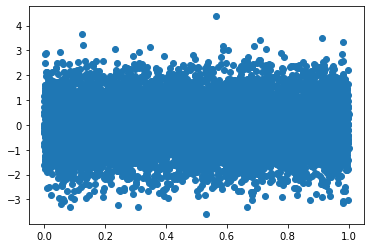

In [14]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y)

It's not clear what the distributions are for each axis. Can make two smaller plots of histograms to see:

important to note that `GridSpec` uses the elements of a list, indexing starts at zero and slicing is key to get the beginning and end of a list

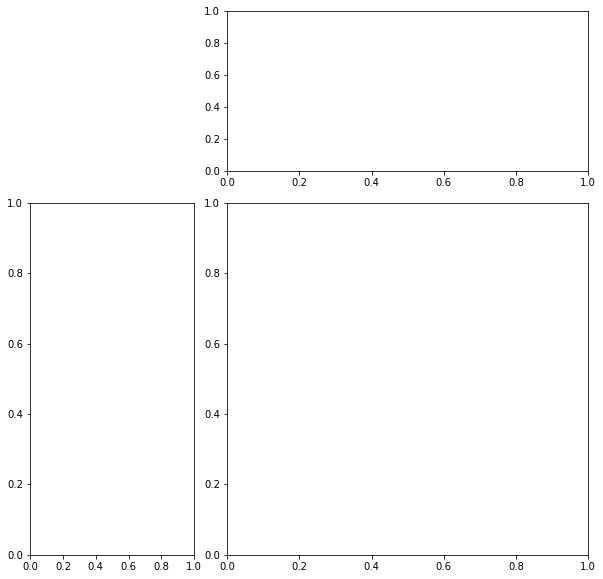

In [ ]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(10,10))
gspec = gridspec.GridSpec(3,3)

top_histogram = plt.subplot(gspec[0, 1:]) # starts in row 0, covering off the first element, the middle position, and to the end of the row

side_histogram = plt.subplot(gspec[1:, 0]) # starts in row 1 and down to the bottom, but only in column 0

lower_right = plt.subplot(gspec[1:, 1:]) # where the scatterplot will go

Now fill in the plots with data:

In [16]:
# fake data
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   2.,   3.,   1.,   1.,   5.,   0.,   0.,   8.,   5.,
         13.,  10.,  13.,  20.,  20.,   8.,  26.,  31.,  49.,  41.,  43.,
         69.,  63.,  81.,  89.,  94., 125., 141., 134., 150., 147., 186.,
        180., 225., 227., 242., 248., 271., 262., 254., 290., 310., 307.,
        326., 349., 313., 314., 312., 306., 305., 289., 311., 264., 235.,
        221., 205., 198., 185., 163., 152., 144., 140., 128.,  97.,  92.,
         81.,  67.,  67.,  61.,  42.,  53.,  32.,  31.,  21.,  24.,  13.,
         15.,  13.,   9.,   6.,   7.,   3.,   1.,   3.,   1.,   2.,   2.,
          2.]),
 array([-4.46436054, -4.38574442, -4.30712829, -4.22851216, -4.14989604,
        -4.07127991, -3.99266378, -3.91404765, -3.83543153, -3.7568154 ,
        -3.67819927, -3.59958315, -3.52096702, -3.44235089, -3.36373477,
        -3.28511864, -3.20650251, -3.12788638, -3.04927026, -2.97065413,
        -2.892038  , -2.81

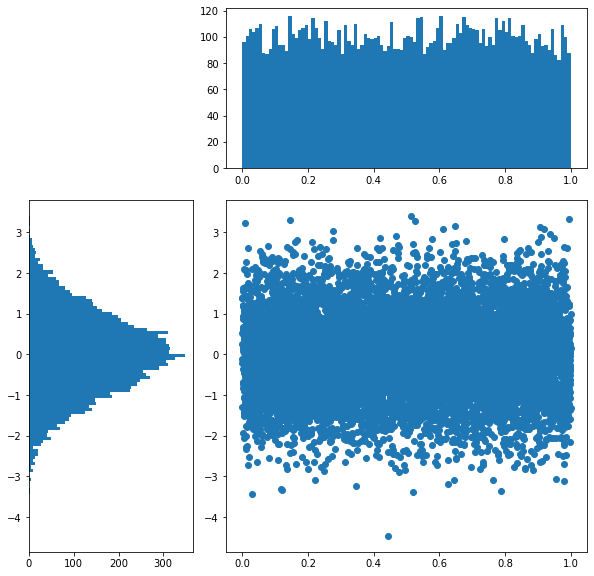

In [19]:
plt.figure(figsize=(10,10))
gspec = gridspec.GridSpec(3,3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

lower_right.scatter(X,Y)
top_histogram.hist(X, bins=100)
side_histogram.hist(Y, bins=100, orientation='horizontal')

We don't actually care about the histogram frequencies (i.e. the y axis for the top_histogram and y axis for the side_histogram) and more so of the ratios of the frequencies.

Build up the figures again:

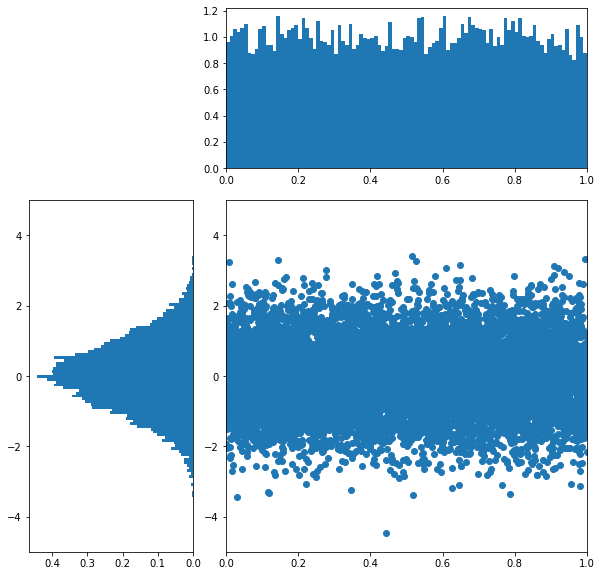

In [20]:
plt.figure(figsize=(10,10))
gspec = gridspec.GridSpec(3,3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

lower_right.scatter(X,Y)

# make it clear this is a density function
top_histogram.hist(X, bins=100, density=True)
side_histogram.hist(Y, bins=100, orientation='horizontal', density=True)

# flip the side histogram's x axis (aka rotate plot 180 degrees)
side_histogram.invert_xaxis()

# change axes limits to get rid of whitespace
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0,1)
    
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5,5)

**exercise:** recreate the Harvard plot on MOOC engagement and grades from Module 1

## Boxplots
* can get a sense of the weighting of the data
* see the min and max values, the center/median, Q1, and Q3
* the values between Q1 and Q3 shows you the middle 50% of your data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample,
                   'random': random_sample, 
                   'gamma': gamma_sample})
df

,normal,random,gamma
0,0.001622,0.314787,4.342402
1,-1.189813,0.629996,3.602290
2,-0.954512,0.430032,1.279854
3,0.269808,0.959273,0.785138
4,-1.232104,0.486143,1.241887
...,...,...,...
9995,-0.393453,0.835872,1.186277
9996,2.123736,0.881894,0.858599
9997,-0.962888,0.022754,1.174094
9998,-0.278294,0.578399,0.579704


In [3]:
df.describe() # see summary statistics

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,-0.004887,0.499047,1.991025
std,0.997559,0.287444,1.398103
min,-3.752732,0.000093,0.010613
25%,-0.675903,0.248397,0.956206
50%,-0.013630,0.499778,1.670774
75%,0.675465,0.747428,2.666736
max,3.378873,0.999880,11.883075


Like standard deviation, interquartile range is a measure of the variability of the data, which you can plot with a boxplot:

we know matplotlib uses NumPy arrays for data, but since pandas is built on top of NumPy it still works. A Pandas column is actually a NumPy array underneath.

*to suppress output of Artist info, use `;` at the end of statement (a Jupyter notebook trick, not standard Python)*

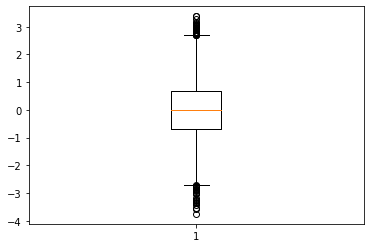

In [5]:
plt.boxplot(df['normal']);

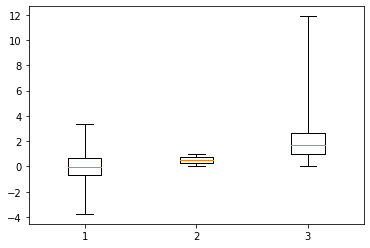

In [6]:
# to plot each column as its own boxplot, have to specify, cannot pass in df as is
plt.boxplot([df['normal'], df['random'], df['gamma']], whis=[0,100]);

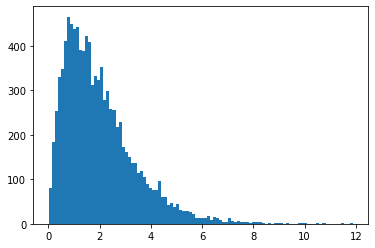

In [8]:
plt.hist(df['gamma'], bins=100);

The gamma distribution is skewed to the right.
### Inset Plot
can overlay an axis on top of another axis within a figure by calling `inset_axes()` on the figure itself and passing in details of the new axis we want to create.

In this example, we want to provide a bounding box of `(0,0.6)` as the bottom left and `(0.6,0.4)` as width and height. These are ratios of the ax object.

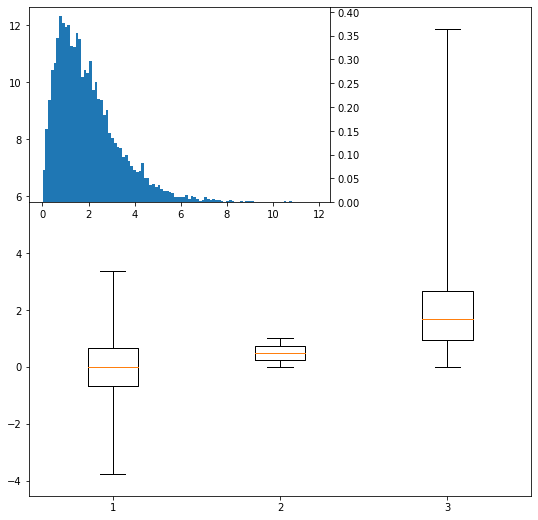

In [10]:
plt.figure(figsize=(9,9))

plt.boxplot([df['normal'], df['random'], df['gamma']], whis=[0,100])

ax2 = plt.gca().inset_axes([0,0.6,0.6,0.4]) # new inset_axis object
ax2.hist(df['gamma'], bins=100, density=True) # plot the histogram on this new inset_axis

# flip tick labels to the right so they don't clash with the main boxplot
ax2.yaxis.tick_right()

### Showing Outliers
Now, we often want to look at a boxplot not by seeing the maximum and minimum values but instead by emphasizing outliers. 
How outliers are detected really depends, and there are various mechanisms to determine whether an observation is an outlier or not. If we look at the documentation though, the default for matplotlib is that outliers are all data points which are either greater than or less than the distance between the hinge (the bottom or top of the box, or first and third quartile), and 1.5 * the inter-quartile range (IQR). The interquartile range is the distance between the two hinges, which captures 50% of our data. So if we omit the `whis` parameter to the boxplot call we'll see the outliers using this method plotted.

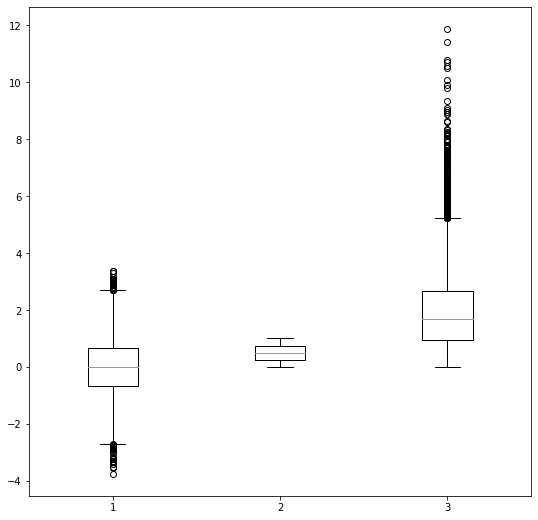

In [11]:
plt.figure(figsize=(9,9))
plt.boxplot([ df['normal'], df['random'], df['gamma'] ]);

Each circle is a single outlier observation.

## Heat Maps
Anything with 2D spatial aspects are prime for heat maps. Don't use with categorical data because it misleads the user into looking for patterns and order through spatial proximity.

In Matplotlib, a heat map is basically a 2D histogram where `x` and `y` are points and the color represents the frequency of the observation. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

Example: NYC traffic data

* 'Plaza ID': where the different traffic cameras are set up
* 'Direction': I (incoming), O (outgoing)
* two different tolling systems (EZ Pass and VToll)

In [3]:
df = pd.read_csv("../assets/NYC hourly traffic.csv")

# convert Date to datetime
df['Date'] = df['Date'].apply(pd.to_datetime)

df.head() 

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll
0,21,2022-08-06,0,I,2820,649
1,21,2022-08-06,1,I,2124,474
2,21,2022-08-06,2,I,1617,391
3,21,2022-08-06,3,I,1228,358
4,21,2022-08-06,4,I,1604,368


Narrow it down to one traffic camera in early 2017 using `numexpr` package (similar to SQL):

In [4]:
sample = df.query('`Plaza ID`==5 & Date>"2016-12-30" & Date<"2017-05-01"')
sample

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll
735652,5,2017-04-29,0,I,216,25
735653,5,2017-04-29,0,O,100,23
735654,5,2017-04-29,1,I,111,21
735655,5,2017-04-29,1,O,53,18
735656,5,2017-04-29,2,I,72,16
...,...,...,...,...,...,...
773399,5,2016-12-31,21,O,234,54
773400,5,2016-12-31,22,I,180,46
773401,5,2016-12-31,22,O,177,40
773402,5,2016-12-31,23,I,126,30


In [6]:
sample = df[(df['Plaza ID'] == 5) & (df['Date'] > '2016-12-30') & (df['Date']<'2017-05-01')]
sample

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll
735652,5,2017-04-29,0,I,216,25
735653,5,2017-04-29,0,O,100,23
735654,5,2017-04-29,1,I,111,21
735655,5,2017-04-29,1,O,53,18
735656,5,2017-04-29,2,I,72,16
...,...,...,...,...,...,...
773399,5,2016-12-31,21,O,234,54
773400,5,2016-12-31,22,I,180,46
773401,5,2016-12-31,22,O,177,40
773402,5,2016-12-31,23,I,126,30


Look at the activity over the day:

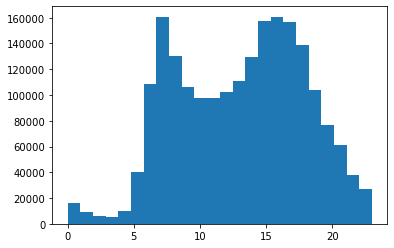

In [7]:
# since there are 24 hours in a day, set the number of bins=24
# want the frequency (the weights for each bin) as the number of vehicles which use EZ Pass
plt.hist(sample['Hour'], bins=24, weights=sample['# Vehicles - E-ZPass']);

Interpretation: rush hour traffic at 7am and 3-6 pm!

Now let's look at day of the week:

First need to make the Day of Week column. A dataframe column is a Series object which has the attribute `.dt` on it which allows you to do datetime transformations.

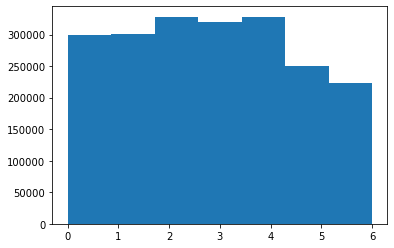

In [9]:
sample['Day of Week'] = sample['Date'].dt.dayofweek # returns an int 0-6

plt.hist(sample['Day of Week'], bins=7, weights=sample['# Vehicles - E-ZPass']);

Interpretation: traffic seems to be pretty steady except for days 5 and 6 which is the weekend (Saturday and Sunday, respectively)

Make a heat map using `plt.hist2d()` to get a look at both hourly and daily traffic. This way you don't have to create histograms for the hourly data for each day of the week.

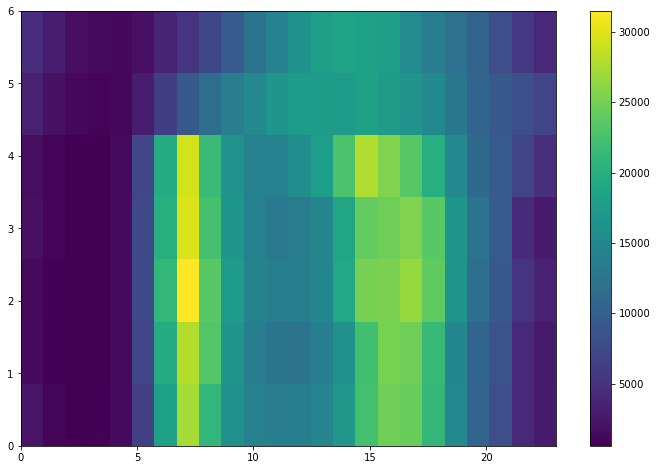

In [13]:
plt.figure(figsize=(12,8))
plt.hist2d(sample['Hour'],
           sample['Day of Week'],
           bins=[24,7],
           weights=sample['# Vehicles - E-ZPass'])

# add legend telling you value of each bin
plt.colorbar()

Do a heat map that looks at month vs week of the month with regards to E-Z Pass traffic:

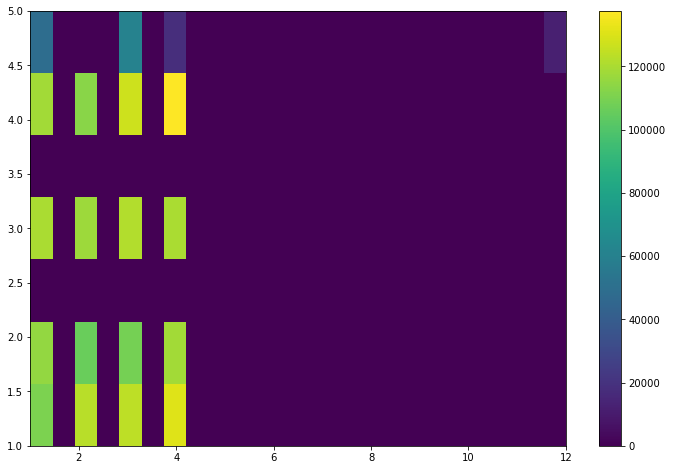

In [18]:
sample['Month'] = sample['Date'].dt.month
sample['Week of Month'] = (sample['Date'].dt.day - 1) // 7 + 1

plt.figure(figsize=(12,8))
plt.hist2d(sample['Month'],
           sample['Week of Month'],
           bins=[24,7],
           weights=sample['# Vehicles - E-ZPass'])

plt.colorbar()

## Animation
Need to turn on widget in the background to run animation. Can't change it once you set it.

Use `FuncAnimation` to create your animation but first defining a function that iteratively gets called. This function clears axis object and redraws the next frame of animation. The frames are then stacked together to create a video.

In [19]:
%matplotlib widget

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

Example: pull out 100 samples from normal distribution

In [20]:
n = 100
x = np.random.randn(n) # randn == random normal distribution

In [23]:
# create the function that'll do the plotting, where 'curr' is the current frame
def update(curr):
    # stopping criteria (aka when we're at the end of our list)
    if curr == n:
        a.event_source.stop()
        
    # clear the current axes
    plt.cla()
    
    # now plot the histogram
    
    # set bin numbers to a predictable value
    bins = np.arange(-4,4,0.5)
    
    # use the current frame number to generate histogram
    plt.hist(x[:curr], bins=bins) 
    
    # set axes limits
    plt.axis([-4,4,0,30])
    
    # add labels
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate(f"n = {curr}", [3,27])

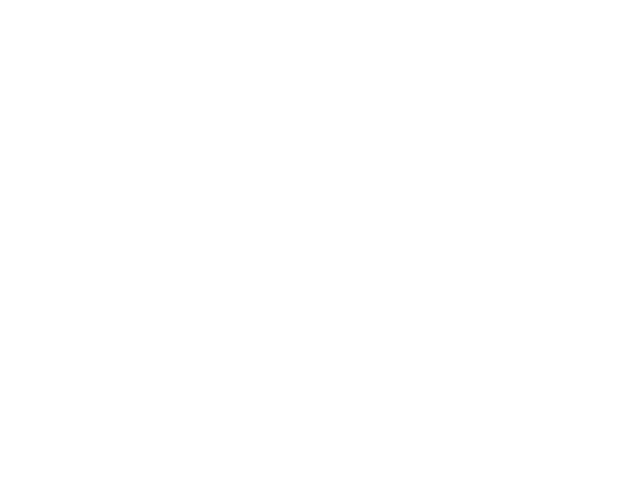

In [24]:
a = animation.FuncAnimation(plt.figure(), update, interval=100)

# tell the widget back end to show
plt.show() 